In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-19.5876386380734 15.787732991334508
-32.680072274153744 -152.9175465873522
59.96676251269946 167.40003352646778
-58.211017657461326 87.29754319703471
29.895806923615552 97.6089937122623
-45.3023732260855 157.29294736572473
-76.54394994490855 -61.4760156649793
37.349855597307524 -138.59906550756813
40.277335368388265 -174.86824726664804
-85.54534234588915 -96.6978333332054
1.5888077604584936 -84.52090679581094
-66.5253788286493 -96.90462544696248
-18.63279712581722 -21.410488690618195
37.006837310240286 137.24509461692412
18.426110562577776 -25.976916628407338
-19.232980249471254 -85.53918247480102
-16.581314324617466 -70.88584202769636
-2.758149912697135 -88.2983024899502
36.24704346102703 -79.54347961423272
31.94453280845346 171.38421474883768
-6.001074009935053 44.03030349222104
-25.41902189685645 56.6862850467796
-84.03958004248683 -144.54844277493876
86.3228464730179 -64.08921423786784
-47.41733861911785 109.19086719413218
-69.36771153475974 108.57085739208424
24.51463376566379 13

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

617

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dc8b6483c7d7053011a5693338446a6


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | outjo
Processing Record 2 of Set 13 | mataura
Processing Record 3 of Set 13 | tilichiki
Processing Record 4 of Set 13 | busselton
Processing Record 5 of Set 13 | tezu
Processing Record 6 of Set 13 | hobart
Processing Record 7 of Set 13 | ushuaia
Processing Record 8 of Set 13 | fortuna
Processing Record 9 of Set 13 | kapaa
Processing Record 10 of Set 13 | punta arenas
Processing Record 11 of Set 13 | manta
Processing Record 12 of Set 13 | georgetown
Processing Record 13 of Set 13 | kurobe
City not found. Skipping...
Processing Record 14 of Set 13 | ponta do sol
Processing Record 15 of Set 13 | pisco
Processing Record 16 of Set 13 | torata
Processing Record 17 of Set 13 | san cristobal
Processing Record 18 of Set 13 | reidsville
Processing Record 19 of Set 13 | nikolskoye
Processing Record 20 of Set 13 | micheweni
Processing Record 21 of Set 13 | saint-philippe
Processing Record 22 of Set 13 | nar

Processing Record 37 of Set 16 | vlakhopoulon
Processing Record 38 of Set 16 | bethel
Processing Record 39 of Set 16 | mandapam
Processing Record 40 of Set 16 | touros
Processing Record 41 of Set 16 | lompoc
Processing Record 42 of Set 16 | burnie
Processing Record 43 of Set 16 | bredasdorp
Processing Record 44 of Set 16 | hami
Processing Record 45 of Set 16 | abonnema
Processing Record 46 of Set 16 | temerloh
Processing Record 47 of Set 16 | husavik
Processing Record 48 of Set 16 | souillac
Processing Record 49 of Set 16 | inyonga
Processing Record 50 of Set 16 | kavaratti
Processing Record 1 of Set 17 | buqayq
City not found. Skipping...
Processing Record 2 of Set 17 | suamico
Processing Record 3 of Set 17 | saldanha
Processing Record 4 of Set 17 | lenki
City not found. Skipping...
Processing Record 5 of Set 17 | castro
Processing Record 6 of Set 17 | marzuq
Processing Record 7 of Set 17 | port alfred
Processing Record 8 of Set 17 | ancud
Processing Record 9 of Set 17 | port hardy
Pr

Processing Record 21 of Set 20 | sucua
Processing Record 22 of Set 20 | kargasok
Processing Record 23 of Set 20 | paramonga
Processing Record 24 of Set 20 | gobabis
Processing Record 25 of Set 20 | aklavik
Processing Record 26 of Set 20 | ondorhaan
City not found. Skipping...
Processing Record 27 of Set 20 | tsihombe
City not found. Skipping...
Processing Record 28 of Set 20 | ivdel
Processing Record 29 of Set 20 | melfi
Processing Record 30 of Set 20 | durusu
Processing Record 31 of Set 20 | kahului
Processing Record 32 of Set 20 | pevek
Processing Record 33 of Set 20 | los llanos de aridane
Processing Record 34 of Set 20 | toliary
City not found. Skipping...
Processing Record 35 of Set 20 | sangar
Processing Record 36 of Set 20 | calderitas
Processing Record 37 of Set 20 | pangai
Processing Record 38 of Set 20 | carutapera
Processing Record 39 of Set 20 | fort nelson
Processing Record 40 of Set 20 | karratha
Processing Record 41 of Set 20 | mtinko
Processing Record 42 of Set 20 | par

Processing Record 9 of Set 24 | baker city
Processing Record 10 of Set 24 | doctor pedro p. pena
City not found. Skipping...
Processing Record 11 of Set 24 | formosa
Processing Record 12 of Set 24 | sarh
Processing Record 13 of Set 24 | akdepe
Processing Record 14 of Set 24 | buala
Processing Record 15 of Set 24 | cabedelo
Processing Record 16 of Set 24 | rosarito
Processing Record 17 of Set 24 | bath
Processing Record 18 of Set 24 | cooma
Processing Record 19 of Set 24 | bose
Processing Record 20 of Set 24 | bubaque
Processing Record 21 of Set 24 | warrington
Processing Record 22 of Set 24 | jenbach
Processing Record 23 of Set 24 | carballo
Processing Record 24 of Set 24 | okha
Processing Record 25 of Set 24 | bohl-iggelheim
Processing Record 26 of Set 24 | inhambane
Processing Record 27 of Set 24 | saint marys
Processing Record 28 of Set 24 | sisimiut
Processing Record 29 of Set 24 | antofagasta
Processing Record 30 of Set 24 | kattivakkam
Processing Record 31 of Set 24 | karkaralins

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Outjo,-20.1167,16.1500,63.63,25,0,8.88,NA,2022-07-17 16:59:31
1,Mataura,-46.1927,168.8643,51.48,83,83,6.58,NZ,2022-07-17 16:59:32
2,Tilichiki,60.4667,166.1000,52.18,91,76,5.75,RU,2022-07-17 16:59:32
3,Busselton,-33.6500,115.3333,53.35,93,100,13.11,AU,2022-07-17 16:59:32
4,Tezu,27.9167,96.1667,77.63,98,68,2.59,IN,2022-07-17 16:59:33
5,Hobart,-42.8794,147.3294,39.06,79,40,13.80,AU,2022-07-17 16:58:48
6,Ushuaia,-54.8000,-68.3000,42.46,52,40,10.36,AR,2022-07-17 16:59:33
7,Fortuna,40.5982,-124.1573,58.98,76,43,7.29,US,2022-07-17 16:59:33
8,Kapaa,22.0752,-159.3190,77.11,85,100,3.00,US,2022-07-17 16:59:34
9,Punta Arenas,-53.1500,-70.9167,33.91,80,0,16.11,CL,2022-07-17 16:56:09


In [17]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Outjo,NA,2022-07-17 16:59:31,-20.1167,16.1500,63.63,25,0,8.88
1,Mataura,NZ,2022-07-17 16:59:32,-46.1927,168.8643,51.48,83,83,6.58
2,Tilichiki,RU,2022-07-17 16:59:32,60.4667,166.1000,52.18,91,76,5.75
3,Busselton,AU,2022-07-17 16:59:32,-33.6500,115.3333,53.35,93,100,13.11
4,Tezu,IN,2022-07-17 16:59:33,27.9167,96.1667,77.63,98,68,2.59
5,Hobart,AU,2022-07-17 16:58:48,-42.8794,147.3294,39.06,79,40,13.80
6,Ushuaia,AR,2022-07-17 16:59:33,-54.8000,-68.3000,42.46,52,40,10.36
7,Fortuna,US,2022-07-17 16:59:33,40.5982,-124.1573,58.98,76,43,7.29
8,Kapaa,US,2022-07-17 16:59:34,22.0752,-159.3190,77.11,85,100,3.00
9,Punta Arenas,CL,2022-07-17 16:56:09,-53.1500,-70.9167,33.91,80,0,16.11


In [21]:
# Create the output file (CSV).
output_data_file = "World_Weather_Analysis/weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

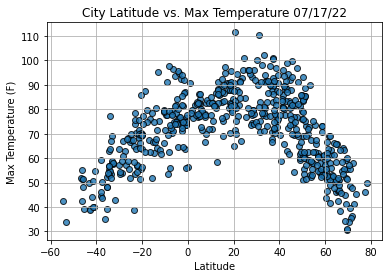

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("World_Weather_Analysis/weather_data/Fig1.png")

# Show plot.
plt.show()

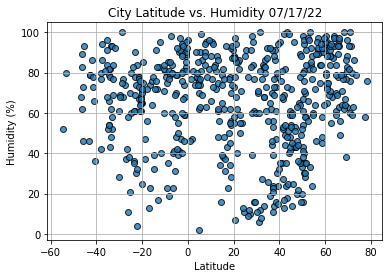

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("World_Weather_Analysis/weather_data/Fig2.png")
# Show plot.
plt.show()

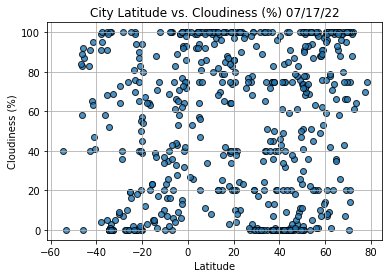

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("World_Weather_Analysis/weather_data/Fig3.png")
# Show plot.
plt.show()

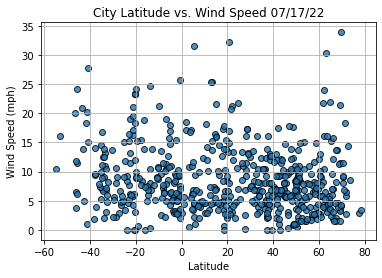

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("World_Weather_Analysis/weather_data/Fig4.png")
# Show plot.
plt.show()

In [28]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [30]:
index13 = city_data_df.loc[13]
index13

City                        Pisco
Country                        PE
Date          2022-07-17 16:59:35
Lat                         -13.7
Lng                      -76.2167
Max Temp                    64.02
Humidity                       72
Cloudiness                      1
Wind Speed                   8.05
Name: 13, dtype: object

In [31]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Tilichiki,RU,2022-07-17 16:59:32,60.4667,166.1000,52.18,91,76,5.75
4,Tezu,IN,2022-07-17 16:59:33,27.9167,96.1667,77.63,98,68,2.59
7,Fortuna,US,2022-07-17 16:59:33,40.5982,-124.1573,58.98,76,43,7.29
8,Kapaa,US,2022-07-17 16:59:34,22.0752,-159.3190,77.11,85,100,3.00
11,Georgetown,MY,2022-07-17 16:59:34,5.4112,100.3354,84.13,90,20,2.30


In [32]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

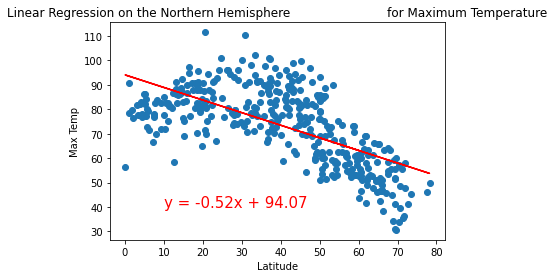

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

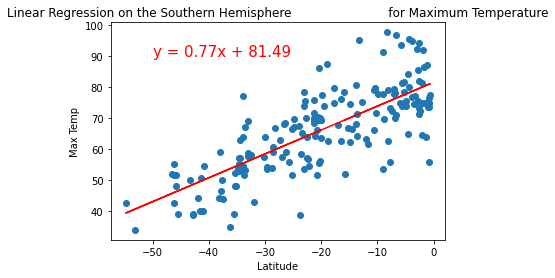

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

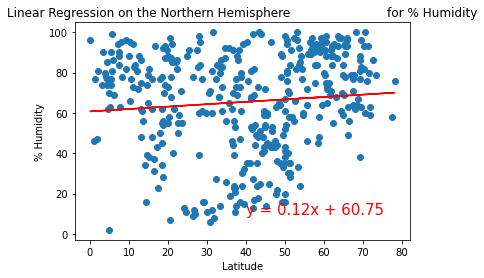

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

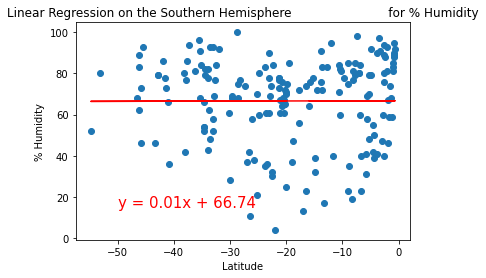

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

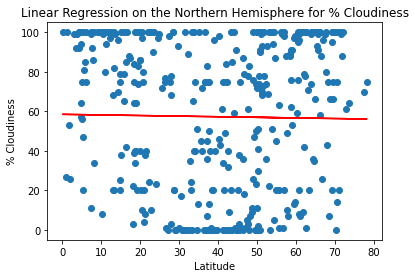

In [39]:
# Linear regression on Nothern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the fuction
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere for % Cloudiness", "% Cloudiness", (-50, 60))

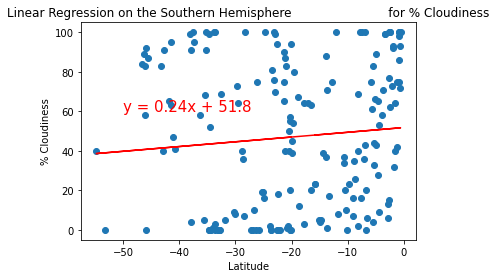

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

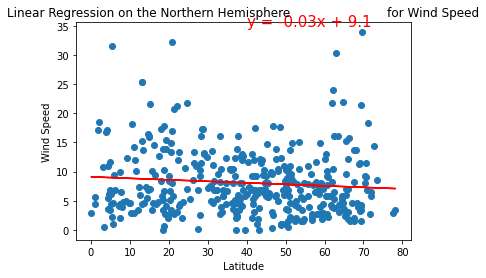

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

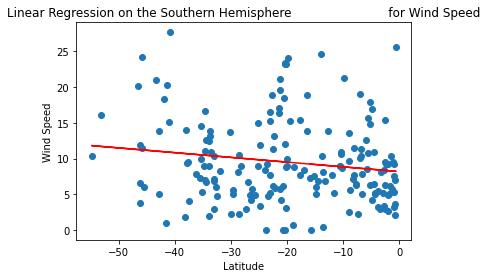

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))